In [35]:
import numpy as np
import pylab as plb
import networkx as nx

# titik yang mana menghubungkan antara node cara membaca berarti (0,1)= saling menghubungkan
points_list = [(0,1),(1,6),(5,6),(5,4),(1,2),(2,3),(2,7)]

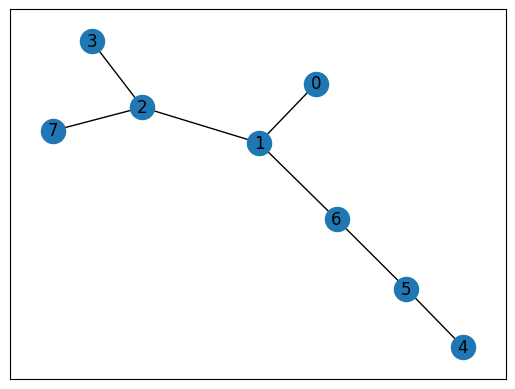

In [36]:
goal = 7

G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plb.show()

In [37]:
#titik maksimal matriks, ini wajib didefinisikan sebagai jalur pembelajaran nantinya
MATRIX_SIZE = 8 #sesuai dengan jumlah dengan jumlah banyak nodes nya

#membuat titik-titik awal menjadi matriks 8*8
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
print(R)

R *= -1
print(R)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [38]:
for point in points_list:
    if point[1] == goal:
        R[point]=100

    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

#mendefinisikan 100 dalam matrik
R[goal,goal] = 100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [39]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

#learning parameter
gamma = 0.8

initial_state = 1

#aksi yang akan diambil dari vector
def avaliable_actions(state):
  current_state_row = R[state,]
  av_act = np.where(current_state_row >= 0)[1]
  return av_act

available_act = avaliable_actions(initial_state)

#mesin memutuskan untuk mesin selanjutnya
def sample_next_action(avaliable_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

#menyimpan hasil dari langkah yang diambil
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)


max_value 0.0


<ipython-input-39-e4f0f889fb22>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
<ipython-input-39-e4f0f889fb22>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


0

max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 100.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 180.0
score: 155.55555555555554
max_value 0.0
score: 155.55555555555554
max_value 0.0
score: 155.55555555555554
max_value 0.0
score: 155.55555555555554
max_value 0.0
score: 155.55555555555554
max_value 144.0
score: 235.55555555555554
max_value 144.0
score: 315.55555555555554
max_value 0.0
score: 315.55555555555554
max_value 0.0
score: 315.55555555555554
max_value 115.2
score: 379.55555555555554
max_value 0.0
score: 379.55555555555554
max_value 0.0
score: 379.55555555555554
max_value 0.0
score: 379.55555555555554
max_value 144.0
score: 379.55555555555554
max_value 144.0
score: 379.55555555555554
max_value 0.0
score: 379.55555555555554
max_value 180.0
score: 424.0
max_value 0.0
score: 424.0
max_value 144.0
score: 424.0
max_value 0.0
score: 424.0
max_value 144.0

<ipython-input-39-e4f0f889fb22>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
<ipython-input-39-e4f0f889fb22>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
<ipython-input-39-e4f0f889fb22>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


score: 786.1351567614752
max_value 263.9424
score: 786.1351567614752
max_value 58.98240000000001
score: 786.1351567614752
max_value 211.15392000000003
score: 788.4939744429088
max_value 211.15392000000003
score: 790.8527921243423
max_value 211.15392000000003
score: 793.2116098057759
max_value 73.72800000000001
score: 821.1449770859097
max_value 168.92313600000003
score: 841.4990907107004
max_value 168.92313600000003
score: 843.3861448558473
max_value 168.92313600000003
score: 845.2731990009942
max_value 168.92313600000003
score: 845.2731990009942
max_value 168.92313600000003
score: 845.2731990009942
max_value 135.13850880000004
score: 861.5564899008268
max_value 211.15392000000003
score: 861.5564899008268
max_value 168.92313600000003
score: 861.5564899008268
max_value 268.923136
score: 878.6659444578247
max_value 315.1385088
score: 766.0543076098988
max_value 73.72800000000001
score: 766.0543076098988
max_value 73.72800000000001
score: 766.0543076098988
max_value 168.92313600000003
sco

<ipython-input-40-eea914e67a10>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


<function matplotlib.pyplot.show(close=None, block=None)>

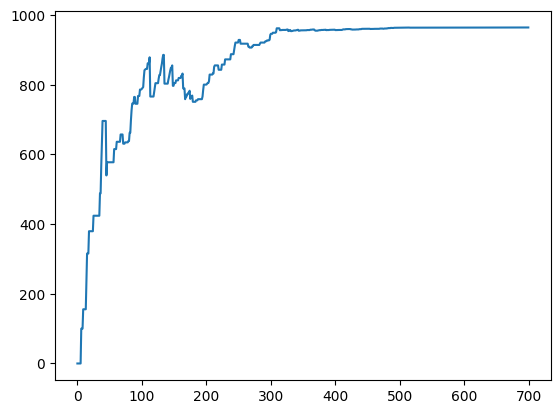

In [40]:
#training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = avaliable_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('score:', str(score))

print("trained Q matrix:")
print(Q/np.max(Q)*100)

#testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("most efficient path:")
print(steps)

plb.plot(scores)
plb.show

